In [1]:
from MP_functions import *

### Load Data

In [2]:
data = pd.read_csv("decreased", sep=",", header=None)
data.shape

(20000, 1)

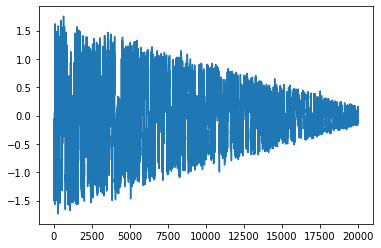

In [3]:
plt.plot(data)

In [4]:
#Sparse data
data = pd.DataFrame(data[::20].values, index = np.arange(0,len(data[::20])))
data.shape

(1000, 1)

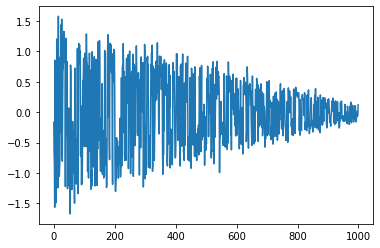

In [5]:
plt.plot(data)

### Obtain Chebyshev coefficients through defined interval

In [6]:
window_size = 100
step = 20
degree = 10

start = 0
stop = 901

coefficient_matrix, optimal_interval_total = extract_coeffs(data, window_size, step, degree, start, stop, plot_pdfs = True, plot_coeffs = True)

# New interval extrapolation function

In [7]:
steps_ahead = 2

In [8]:
interval_left = []
interval_right = []

In [9]:
optimal_interval_total = np.array(optimal_interval_total)

In [10]:
optimal_interval_total[:,1]

array([1.5797614 , 1.5312653 , 1.2876592 , 1.2876592 , 1.2876592 ,
       1.2876592 , 1.2753488 , 1.2753488 , 1.2753488 , 1.1355081 ,
       1.1282874 , 1.1282874 , 1.1154081 , 1.1419759 , 1.1419759 ,
       1.1419759 , 1.1419759 , 1.1419759 , 0.96349166, 0.96349166,
       0.96349166, 0.95620212, 0.83446548, 0.83446548, 0.83446548,
       0.83446548, 0.83446548, 0.82680099, 0.82680099, 0.74491151,
       0.74491151, 0.74491151, 0.59541548, 0.55596213, 0.51976452,
       0.51976452, 0.46849594, 0.46849594, 0.41137758, 0.41137758,
       0.38791288])

In [11]:
X = np.arange(0, optimal_interval_total.shape[0])
y_left = optimal_interval_total[:,0]
y_right = optimal_interval_total[:,1]

In [12]:
for step in range(0,steps_ahead):    
    reg_left = LinearRegression().fit(X[:,None], y_left)
    interval_left += reg_left.predict(np.array([len(X)+step])[:,None]).tolist()

In [13]:
for step in range(0,steps_ahead): 
    reg_right = LinearRegression().fit(X[:,None], y_right)
    interval_right += reg_right.predict(np.array([len(X)+step])[:,None]).tolist()

In [14]:
forward_intervals = np.array([interval_left, interval_right]).T

In [15]:
forward_intervals

array([[-0.38088119,  0.39359324],
       [-0.3519301 ,  0.3675611 ]])

### Obtain through regression 

In [16]:
n_steps_back = 4

new_coefficients = coefficients_regression(coefficient_matrix, n_steps_back, steps_ahead)

In [18]:
# Sample size for each curve approximation
sample_size = [50, 50]
sample_total = rejection_sampling(new_coefficients, forward_intervals, sample_size = sample_size, plot_pdfs = True, pdf_check = True, degree=degree)

## Save one trajectory

In [19]:
x = np.arange(stop,stop + len(sample_total))
forecast_result = pd.DataFrame(sample_total, index = x.tolist(), columns = ["Forecast"])

In [25]:
forecast_result.head()

,Forecast
901,-0.267223
902,-0.236627
903,-0.073595
904,-0.222538
905,-0.057689


## Create & save sample 20 trajectories

In [20]:
control_sample = rejection_sampling_nruns(new_coefficients, forward_intervals, sample_size, plot_pdfs = True, pdf_check = False, n_runs = 19)

In [21]:
control_sample.shape

(100, 20)

### Save trajectories individually

In [22]:
header_cols = []
for i in range(0,20):
    header_cols += ["Trajectory " + str(i + 1)]

In [23]:
forecast_result_individual = pd.DataFrame(control_sample, columns = header_cols)

In [24]:
forecast_result_individual.head()

,Trajectory 1,Trajectory 2,Trajectory 3,Trajectory 4,Trajectory 5,Trajectory 6,Trajectory 7,Trajectory 8,Trajectory 9,Trajectory 10,Trajectory 11,Trajectory 12,Trajectory 13,Trajectory 14,Trajectory 15,Trajectory 16,Trajectory 17,Trajectory 18,Trajectory 19,Trajectory 20
0,-0.267223,0.298060,-0.246341,-0.334476,0.051726,0.154960,-0.116912,0.188366,-0.185461,-0.126424,-0.127903,0.056813,-0.315017,-0.073595,-0.346377,-0.326651,0.132937,-0.331564,0.053622,-0.365485
1,-0.236627,0.305258,0.050781,-0.281170,0.053622,0.052605,0.301796,0.322803,0.056813,-0.365485,-0.301626,-0.073595,-0.127903,0.125410,-0.315017,0.048280,0.145869,0.133211,-0.058279,-0.065805
2,-0.073595,0.063758,-0.278301,0.052605,-0.290742,-0.272155,-0.281170,-0.163684,-0.217918,0.228775,0.322803,0.154960,0.318780,-0.337627,-0.284712,0.244201,-0.204829,0.305258,-0.227933,-0.229739
3,-0.222538,0.051726,-0.247408,-0.229739,-0.199666,0.322803,-0.290742,0.154960,-0.058279,-0.262588,0.228775,-0.365485,0.188366,-0.300935,0.050781,0.239188,-0.072891,-0.301626,0.001752,-0.259450
4,-0.057689,-0.185461,-0.301626,0.200705,-0.262588,-0.365485,-0.272155,-0.206075,0.188273,-0.206075,-0.284712,-0.127903,-0.284712,0.050781,0.156914,-0.158007,0.160006,0.001752,0.132937,0.049913


### Save statistics summary about trajectories

In [26]:
samples_mean = np.mean(control_sample, axis=1)

samples_std = np.std(control_sample, axis=1)

x = np.arange(stop,stop + len(control_sample))
forecast_result_statistics = pd.DataFrame([samples_mean,samples_std], index = ["mean forecast", "standard deviation (at each time step)"], columns = x.tolist()).T
forecast_result_statistics.head()

,mean forecast,standard deviation (at each time step)
901,-0.111347,0.203229
902,-0.011453,0.205270
903,-0.058563,0.235560
904,-0.078650,0.212461
905,-0.088560,0.185138


## Plot solutions

In [27]:
solution_plot(data, sample_total, stop)